# Introdução

OBS:

#### Este notebook possui HTML/Javascript incorporado a alguns graficos, que não são renderizados pelo github. 
#### Para a visualização de todos os gráficos e do notebook completo, abra o notebook com o __NBViewer__. 

<br>

# Estudo das Ocorrências de Roubo de Celular na Capital de SP

<br>

### Índice:
1. Introdução
2. Importando Bibliotecas e Datasets
3. Conhecendo os Dados
4. Pré-processamento
5. Análise Exploratória
6. Prevendo Roubos de Celular 
<br>    6.1. - Modelagem ARIMA
<br>    6.2. - Validação
<br>    6.3. - Previsão


### 1. Introdução:

#### Apresentando o dataset:
__ANO_BO__ - Ano de registro da ocorrência.
<br>__DATAOCORRENCIA__: Data do roubo do celular.
<br>__PERIDOOCORRENCIA__: Período do roubo do celular.
<br>__BAIRRO__ - Bairro em que o celular foi roubado.
<br>__CIDADE__ - Cidade em que o celular foi roubado.
<br>__LATITUDE__ - Latitude em que o celular foi roubado.
<br>__LONGITUDE__ - Longitude em que o celular foi roubado.
<br>__LOGRADOURO__ - Logradouro em que o celular foi roubado.
<br>__DESCRICAOLOCAL__ - Descrição do local em que o celular foi roubado.
<br>__DESCR_TIPO_VEICULO__ - Descrição do veículo em que o celular foi roubado.


#### Objetivos:
 - Determinar como as ocorrências de roubo de celular evoluiram em relação ao tempo.
 - Determinar os períodos onde ocorrem os maiores números de roubo de celular.
 - Determinar os logradouros, bairros e regiões com maiores números de roubo de celular.
 - Determinar os locais com maiores números de roubo de celular.
 - Determinar veículos com maiores números de roubo de celular em veículo.
 - Utilizar o modelo ARIMA para prever o número de ocorrências nos próximos anos.
 
 
#### Sobre o dataset:

Desde 1995, a Secretaria da Segurança Pública divulga de forma pioneira no Brasil os indicadores criminais <br>
trimestralmente no Diário oficial.

Em decorrência da evolução da tecnologia e o amplo uso da internet, a partir de abril de 2011 esses dados <br>
passaram a ser divulgados em seu site mensalmente por região, município e unidade policial.<br>

Além desses dados, são apresentados estudos como o Perfil de Homicídio e o Perfil de Roubos além da <br>
produtividade policial.

Ampliando essa divulgação, desde 09 de maio de 2016, a SSP/SP mantém o maior portal de informações sobre <br>
segurança pública do país, disponibilizando boletins de ocorrência, inclusive os complementares, disponíveis <br>
no sistema Registro Digital de Ocorrências da Polícia Civil (RDO) desde 2003, em relação aos homicídios dolosos, <br>
latrocínios e lesão corporal seguida de morte e registrados a partir de 2013, tanto em relação a morte decorrente <br>
de oposição intervenção policial, quanto em relação aos casos de mortes suspeitas.

Na mesma data também foi disponibilizada tabela de dados referentes aos óbitos que deram entrada no Instituto <br>
Médico Legal (IML) desde 2013, ano em que foi implantado o serviço digital de Gestão de Laudos (GDL) da <br>
Superintendência da Polícia Técnico-Cientifica (SPTC), com os respectivos números dos laudos e boletins de <br>
ocorrência, data de entrada no IML, características das vítimas e número da Declaração de Óbito.

Com a evolução do serviço, em abril de 2017, foram incluídos para pesquisa todos os boletins de roubo e de <br>
furto de veículos disponíveis no RDO desde 2003, além da melhoria do serviço pela possibilidade de extração <br>
dos dados em formato excel.

Em 25 de maio de 2017, para atendimento a uma necessidade demonstrada através de inúmeros pedidos dirigidos à <br>
Secretaria, foram disponibilizados todos os boletins de ocorrência de roubo e furto onde há ao menos um celular <br>
subtraído.

Fonte: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

Os dados estão disponibilizados em http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

# 2. Importando Bibliotecas e Datasets

In [ ]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import glob
import re
import itertools
import numpy as np
import statsmodels.api as sm
import seaborn as sns
!pip install squarify
import squarify

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly

from folium import Map
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# FUNÇÃO PARA IMPORTAR DATASET

dir_path = "/content/drive/My Drive/mineracao roubo de celulares trabalho final/data/"

def importaData(files):
    
    data = dir_path + files
    allFiles = glob.glob('/content/drive/My Drive/mineracao roubo de celulares trabalho final/data/*.csv')

    list_ = []
    cols = ['ANO_BO', 'DATAOCORRENCIA', 'PERIDOOCORRENCIA', 'BAIRRO', 'CIDADE', 'LATITUDE', 'LONGITUDE', 'LOGRADOURO', \
           'DESCRICAOLOCAL', 'DESCR_TIPO_VEICULO']

    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, delimiter=';', usecols=cols)
        list_.append(df)

    df = pd.concat(list_, axis = 0, ignore_index = True)
    
    return df

# IMPORTANDO DATASET

all_data = importaData('*.csv')

# 3. Conhecendo os Dados

In [ ]:
# VISUALIZANDO DATAFRAME

all_data.head()

ANO_BO DATAOCORRENCIA  ...   DESCRICAOLOCAL DESCR_TIPO_VEICULO
0   2018     31/08/2018  ...  Shopping Center                NaN
1   2018     31/08/2018  ...      Via pública                NaN
2   2018     30/08/2018  ...      Via Pública                NaN
3   2018     30/08/2018  ...      Via Pública                NaN
4   2018     31/08/2018  ...      Via pública                NaN

[5 rows x 10 columns]

In [ ]:
# VISUALIZANDO DATAFRAME

all_data.tail()

ANO_BO DATAOCORRENCIA  ... DESCRICAOLOCAL DESCR_TIPO_VEICULO
1709453   2019     31/01/2019  ...    Via pública                NaN
1709454   2019     31/01/2019  ...    Via pública                NaN
1709455   2019     31/01/2019  ...    Via pública          AUTOMOVEL
1709456   2019     31/01/2019  ...    Via pública        CAMINHONETE
1709457   2019     31/01/2019  ...    Via pública                NaN

[5 rows x 10 columns]

In [ ]:
# DESCRIÇÃO ESTATÍSTICA

all_data.describe()

ANO_BO DATAOCORRENCIA  ... DESCRICAOLOCAL DESCR_TIPO_VEICULO
count   1709458        1709454  ...        1709456             372480
unique       16           5284  ...             39                 26
top        2019     15/02/2020  ...    Via pública          AUTOMOVEL
freq     269765           1296  ...        1119448             229988

[4 rows x 10 columns]

In [ ]:
print("Tipos de dados e valores 'missing': ")

all_data.info()

Tipos de dados e valores 'missing': 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709458 entries, 0 to 1709457
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ANO_BO              object
 1   DATAOCORRENCIA      object
 2   PERIDOOCORRENCIA    object
 3   LOGRADOURO          object
 4   BAIRRO              object
 5   CIDADE              object
 6   LATITUDE            object
 7   LONGITUDE           object
 8   DESCRICAOLOCAL      object
 9   DESCR_TIPO_VEICULO  object
dtypes: object(10)
memory usage: 130.4+ MB


# 4. Pré-processamento

In [ ]:
# REMOVENDO DADOS DUPLICADOS

def removeDuplicados(df):
    
    print('Quantidade de dados duplicados: ', df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print('Quantidade de dados duplicados após remoção: ', df.duplicated().sum())
    
    return df

all_data = removeDuplicados(all_data)

Quantidade de dados duplicados:  428039
Quantidade de dados duplicados após remoção:  0


In [ ]:
# FILTRANDO DADOS DE S.PAULO

def filtraSP(df):

    df.CIDADE.fillna('S.PAULO')
    df = df[df['CIDADE'] == 'S.PAULO']
    del df['CIDADE']
    
    return df


In [ ]:
# TRANSFORMANDO STRINGS PARA LOWER CASE

def lowerCase(df, cols):
    for col in cols:
        df[col] = df[col].str.title()
    
    return df

colsToLower = ["PERIDOOCORRENCIA", "LOGRADOURO", "BAIRRO", "DESCR_TIPO_VEICULO"]

all_data = lowerCase(all_data, colsToLower)

In [ ]:
all_data = all_data[all_data.LATITUDE != 'Roubo (art. 157) - TRANSEUNTE']
all_data = all_data[all_data.LONGITUDE != 'BO PARA INVESTIGAÇÃO']

In [ ]:
# PADRONIZANDO STRINGS

def correct_string(string):
        string = string.replace('Avenida ', 'Av. ').replace('Av ', 'Av. ').replace('Rua ', 'R. ').replace('R ', 'R. ') \
                    .replace('R ', 'R. ').replace(',', '.').replace('Praça ', 'Pr. ').replace('Pr ', 'Pr. ') \
                    .replace('Pública', 'pública').replace('Jardim', 'Jd.').replace('Jd ', 'Jd. ')
        return string

all_data.DESCRICAOLOCAL = all_data.astype(str).DESCRICAOLOCAL.apply(correct_string)  
all_data.LOGRADOURO = all_data.astype(str).LOGRADOURO.apply(correct_string)
all_data.LATITUDE = all_data.LATITUDE.astype(str).apply(correct_string).astype(float)
all_data.LONGITUDE = all_data.LONGITUDE.astype(str).apply(correct_string).astype(float)

In [ ]:
# TRANSFORMANDO DADOS TEMPORAIS

def tratarDatas(df, col = 'DATAOCORRENCIA'):
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

    indexs = []

    for row in df[col].items():
        if row[1] < pd.datetime(2010, 1, 1):
            indexs.append(row[0])

    df.drop(index=indexs, axis=1, inplace=True)

    df['diasemana'] = df[col].dt.day_name()
    df['mesano'] = df[col].dt.strftime('%Y-%m')
    df['mes'] = df[col].dt.month

    df.drop(index=df[df['mesano'] == 'NaT'].index, inplace=True, axis=0)

    return df

all_data = tratarDatas(all_data)

# 5. Análise Exploratória

## São Paulo (estado)

In [ ]:
# VISUALIZANDO DATAFRAME LIMPO

all_data.head()

ANO_BO DATAOCORRENCIA PERIDOOCORRENCIA  ... diasemana   mesano  mes
0   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0
1   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0
2   2018     2018-08-30       Pela Manhã  ...  Thursday  2018-08  8.0
3   2018     2018-08-30          A Noite  ...  Thursday  2018-08  8.0
4   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0

[5 rows x 13 columns]

In [ ]:
df_ts = all_data.groupby('DATAOCORRENCIA').count()["ANO_BO"].to_frame().rename(columns={"ANO_BO": "OCORRENCIAS"})

trace = [go.Scatter(x = df_ts.index, y = df_ts.OCORRENCIAS)]

layout = dict(
    title='Ocorrências de Roubo de Celular',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

In [ ]:
ocorrencias = all_data.groupby('mesano').count()['ANO_BO'].reset_index()
ocorrencias.rename(columns={'mesano': 'Data', 'ANO_BO':'Ocorrências de Roubo de Celular'}, inplace=True)

trace = [go.Scatter(x = ocorrencias.Data, y = ocorrencias['Ocorrências de Roubo de Celular'])]

layout = dict(
    title='Ocorrências de Roubo de Celular por Mês',
    yaxis=dict(
    title='Ocorrências'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

Claramente podemos ver uma tendência de aumento no número de ocorrência de roubo de celular.
<br><br>Alguns dos fatores que podem explicar esse aumento são:
<br> - Aumento do número de aparelhos celulares e smartphones.
<br> - Aumento na utilização dos aparelhos em público, devido ao avanço de tecnologias de troca de mensagens.
<br> - Aumento da criminalidade.
<br> - Aumento no número de boletins de ocorrências devido as plataformas digitais.

In [ ]:
# CALCULANDO VARIAÇÕES NO NÚMERO DE OCORRÊNCIAS POR ANO
all_data_until_2019 = all_data[all_data.ANO_BO != 2020]
all_data_until_2019 = all_data_until_2019[all_data.ANO_BO != 2005]

all_data_until_2019.ANO_BO = all_data_until_2019.ANO_BO.astype(int)
ocorrencias_ano = all_data_until_2019.groupby('ANO_BO').count()['DATAOCORRENCIA'].reset_index()
ocorrencias_ano['VARIACAO'] = 0
ocorrencias_ano['VARIACAO_ACUMULADA'] = 0

for i in range (0, 9):
    ocorrencias_ano.iloc[i+1, 2] = round((1 - (ocorrencias_ano.iloc[i, 1] / ocorrencias_ano.iloc[i+1, 1])) * 100, 2)
    ocorrencias_ano.iloc[i+1, 3] = round((ocorrencias_ano.iloc[i, 3] + ocorrencias_ano.iloc[i+1, 2]), 2)
    
ocorrencias_ano.VARIACAO = ocorrencias_ano.VARIACAO.astype(str) + ' %'
ocorrencias_ano.VARIACAO_ACUMULADA = ocorrencias_ano.VARIACAO_ACUMULADA.astype(str) + ' %'
    
ocorrencias_ano

ANO_BO  DATAOCORRENCIA  VARIACAO VARIACAO_ACUMULADA
0    2010           75047     0.0 %              0.0 %
1    2011           80576    6.86 %             6.86 %
2    2012           84058    4.14 %             11.0 %
3    2013          102044   17.63 %            28.63 %
4    2014          152202   32.95 %            61.58 %
5    2015          105081  -44.84 %            16.74 %
6    2016          128463    18.2 %            34.94 %
7    2017          126702   -1.39 %            33.55 %
8    2018          112721   -12.4 %            21.15 %
9    2019          205591   45.17 %            66.32 %

In [ ]:
data = [
    go.Bar(
        x = ocorrencias_ano.ANO_BO.values[1:],
        y = ocorrencias_ano.VARIACAO.values[1:],
        marker = dict(
          color = ['green', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'green']
        ),
        name = 'Variação com ano anterior'
    ), 
    go.Scatter(
        x = ocorrencias_ano.ANO_BO.values[1:], 
        y = ocorrencias_ano.VARIACAO_ACUMULADA.values[1:],
        marker = dict(
          color = 'blue'
        ),        
        name = 'Variação acumulada'
    )
]

layout = dict(
    title='Variação do Número de Ocorrências de Roubo de Celular',
    yaxis=dict(
        title='Variação (%)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
all_data_until_august = all_data[all_data.DATAOCORRENCIA.dt.month <= 8]

# CALCULANDO VARIAÇÕES NO NÚMERO DE OCORRÊNCIAS POR ANO

all_data_until_august.ANO_BO = all_data_until_august.ANO_BO.astype(int)
ocorrencias_ano = all_data_until_august.groupby('ANO_BO').count()['DATAOCORRENCIA'].reset_index()
ocorrencias_ano['VARIACAO'] = 0
ocorrencias_ano['VARIACAO_ACUMULADA'] = 0

for i in range (0, 10):
    ocorrencias_ano.iloc[i+1, 2] = round((1 - (ocorrencias_ano.iloc[i, 1] / ocorrencias_ano.iloc[i+1, 1])) * 100, 2)
    ocorrencias_ano.iloc[i+1, 3] = round((ocorrencias_ano.iloc[i, 3] + ocorrencias_ano.iloc[i+1, 2]), 2)
    
ocorrencias_ano.VARIACAO = ocorrencias_ano.VARIACAO.astype(str) + ' %'
ocorrencias_ano.VARIACAO_ACUMULADA = ocorrencias_ano.VARIACAO_ACUMULADA.astype(str) + ' %'
    
ocorrencias_ano

ANO_BO  DATAOCORRENCIA  VARIACAO VARIACAO_ACUMULADA
0     2010           50665     0.0 %              0.0 %
1     2011           53413    5.14 %             5.14 %
2     2012           57458    7.04 %            12.18 %
3     2013           65915   12.83 %            25.01 %
4     2014          114433    42.4 %            67.41 %
5     2015           65743  -74.06 %            -6.65 %
6     2016           83150   20.93 %            14.28 %
7     2017           88487    6.03 %            20.31 %
8     2018           75148  -17.75 %             2.56 %
9     2019          138241   45.64 %             48.2 %
10    2020          105263  -31.33 %            16.87 %

In [ ]:
data = [
    go.Bar(
        x = ocorrencias_ano.ANO_BO.values[1:],
        y = ocorrencias_ano.VARIACAO.values[1:],
        marker = dict(
          color = ['green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'red']
        ),
        name = 'Variação com ano anterior'
    ), 
    go.Scatter(
        x = ocorrencias_ano.ANO_BO.values[1:], 
        y = ocorrencias_ano.VARIACAO_ACUMULADA.values[1:],
        marker = dict(
          color = 'blue'
        ),        
        name = 'Variação acumulada'
    )
]

layout = dict(
    title='Variação do Número de Ocorrências de Roubo de Celular',
    yaxis=dict(
        title='Variação (%)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
all_data['diasemana'] = pd.Categorical(all_data['diasemana'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

trace = [go.Bar(
            x = all_data['diasemana'].value_counts().sort_index().index,
            y = all_data['diasemana'].value_counts().sort_index().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular por dia da semana (2010 - 2020)',
    yaxis=dict(
        title='Ocorrências'
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)



In [ ]:
all_data_until_2019['mes'] = pd.Categorical(all_data_until_2019['mes'], categories=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0], ordered=True)

trace = [go.Bar(
            x = all_data_until_2019['mes'].value_counts().sort_index().index,
            y = all_data_until_2019['mes'].value_counts().sort_index().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular por mês (2010 - 2019)',
    yaxis=dict(
        title='Ocorrências'
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

In [ ]:
colors = ['#170B3B', '#A9D0F5', '#08088A', '#DBA901']

trace = [go.Pie(labels=all_data.PERIDOOCORRENCIA.unique(), values=all_data.PERIDOOCORRENCIA.value_counts().values,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))]

layout = go.Layout(
    title='Período das Ocorrências de Roubo de Celular (2010 - 2020)'
)

fig = go.Figure(data = trace, layout = layout)

py.iplot(fig)

In [ ]:
# FILTRANDO DADOS DE 2020

data = all_data[all_data["ANO_BO"] == 2020].copy()

In [ ]:
trace = [go.Bar(
            y = data['DESCRICAOLOCAL'].value_counts().index,
            x = data['DESCRICAOLOCAL'].value_counts().values,
            orientation='h',
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    height=800,
    title='Locais das Ocorrências de Roubo de Celular em 2020',
    xaxis=dict(
        title = 'Ocorrências',
        type='log',
        ),
     yaxis=go.layout.YAxis(
     automargin=True
     )
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

As vias públicas são os locais de grande preferência da criminalidade para roubar celulares.

In [ ]:
data_ = data[(data['DESCR_TIPO_VEICULO'] != 'Inexist.') & (data['DESCR_TIPO_VEICULO'] != 'Não Informado')]

trace = [go.Bar(
            x = data_["DESCR_TIPO_VEICULO"].value_counts().index,
            y = data_["DESCR_TIPO_VEICULO"].value_counts().values,
            text=data_["DESCR_TIPO_VEICULO"].value_counts().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular em Veículos (2020)',
    yaxis=dict(
        title='Ocorrências',
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

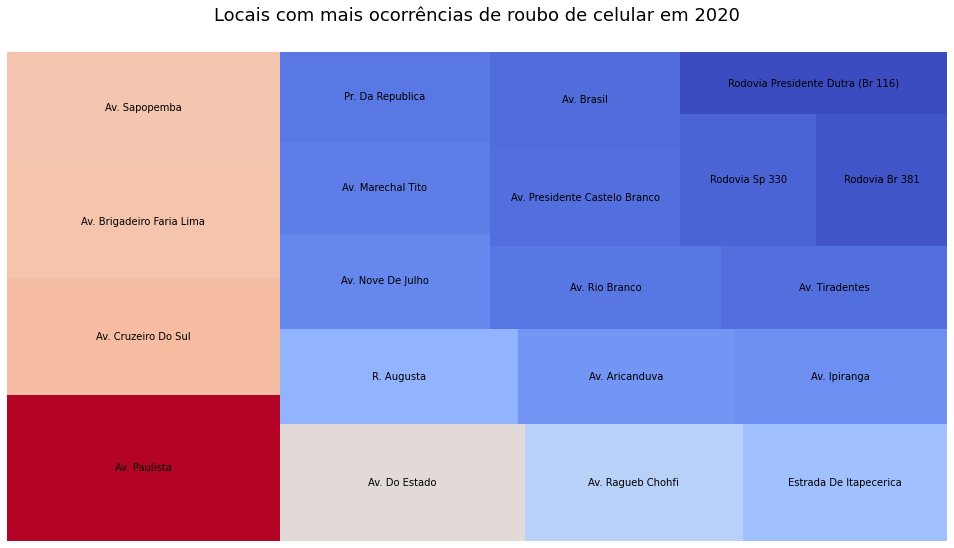

In [ ]:
data_loug = data[data.LOGRADOURO != 'nan']

fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data_loug.LOGRADOURO.value_counts().values[19]
maxi = data_loug.LOGRADOURO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data_loug.LOGRADOURO.value_counts().iloc[:100].values]

squarify.plot(sizes=data_loug.LOGRADOURO.value_counts().iloc[:20].values, label=data_loug.LOGRADOURO.value_counts().iloc[:20].index, color=colors)

plt.axis('off')
plt.title("Locais com mais ocorrências de roubo de celular em 2020", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

Período das ocorrências para cada local:

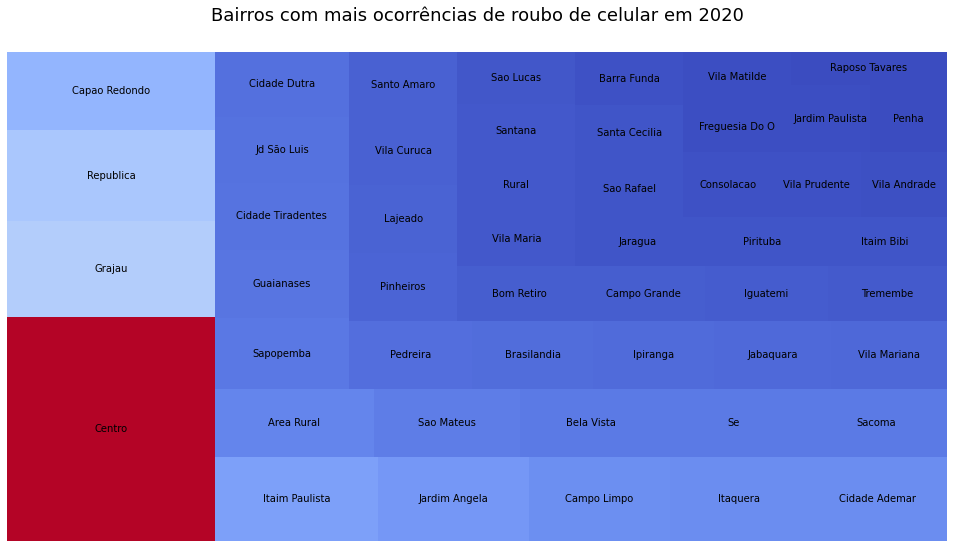

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data.BAIRRO.value_counts().values[49]
maxi = data.BAIRRO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data.BAIRRO.value_counts().iloc[:100].values]

squarify.plot(sizes=data.BAIRRO.value_counts().iloc[:50].values, label=data.BAIRRO.value_counts().iloc[:50].index, color=colors)

plt.axis('off')
plt.title("Bairros com mais ocorrências de roubo de celular em 2020", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

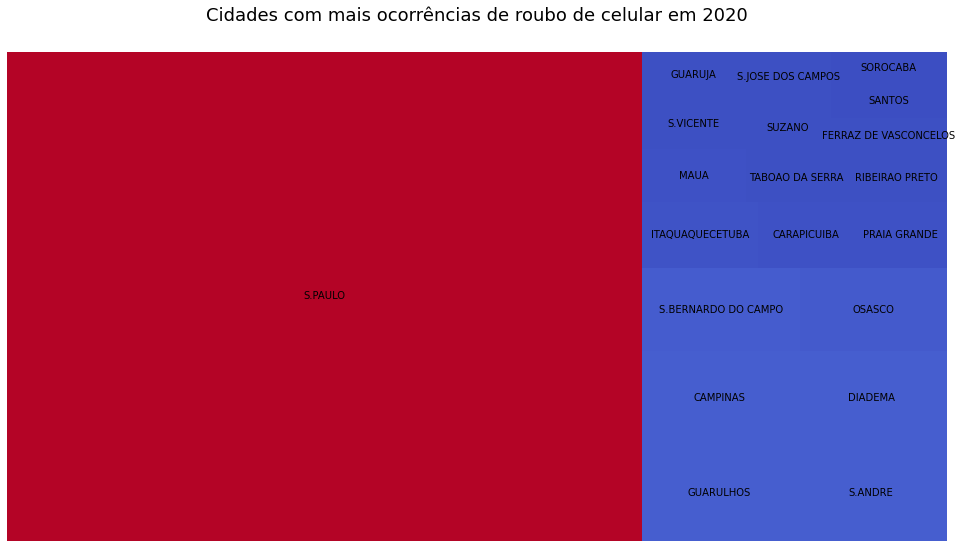

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data.CIDADE.value_counts().values[29]
maxi = data.CIDADE.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data.CIDADE.value_counts().iloc[:100].values]

squarify.plot(sizes=data.CIDADE.value_counts().iloc[:20].values, label=data.CIDADE.value_counts().iloc[:20].index, color=colors)

plt.axis('off')
plt.title("Cidades com mais ocorrências de roubo de celular em 2020", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [ ]:
# REMOVENDO NAs E CRIANDO COLUNA COORDENADAS

df = data.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()
df = df[df['DATAOCORRENCIA'] > "2020-07-01"]
df['coord'] = df[['LATITUDE','LONGITUDE']].apply(tuple, axis=1)

### Mapa de Calor dos Roubos de Celulares em Julho e Agosto de 2020

In [ ]:
m = Map([-23.64992751, -46.62569322], zoom_start=10, width='100%', height='100%')
m.add_child(HeatMap(df['coord'], radius=8))
m

### ClusterMap dos Roubos de Celulares em Julho e Agosto de 2020

In [ ]:
pointMap = Map([-23.550, -46.620], zoom_start=10.5, width='100%', height='100%')
pointMap.add_child(FastMarkerCluster(df['coord']))
pointMap

### IBGE

### Educacao

In [ ]:
url = 'https://drive.google.com/file/d/10GD5NXE6A-VPIfqWfZgw6rVwI7ACJy9p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_mapa_educacao = pd.read_csv(path)
data_mapa_educacao.columns = ['Local', 'Taxa de escolarização de 6 a 14 anos de idade']

data_mapa_educacao

Local  Taxa de escolarização de 6 a 14 anos de idade
0                         Caiuá                                           99.3
1                      Castilho                                           99.1
2                       Dracena                                           98.2
3              Estrela do Norte                                           98.9
4    Euclides da Cunha Paulista                                           98.5
..                          ...                                            ...
640          Nova Independência                                           98.0
641                 Pirapozinho                                           98.8
642         Presidente Prudente                                           97.8
643              Santo Expedito                                           99.1
644                      Taciba                                           99.3

[645 rows x 2 columns]

### PIB

In [ ]:
url = 'https://drive.google.com/file/d/1wvdWVhiiHzoT89OjqSTY65aDO6vtaz_9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_mapa_pib = pd.read_csv(path)
data_mapa_pib.columns = ['Local', 'PIB per capita']

data_mapa_pib

Local  PIB per capita
0                         Caiuá        13633.51
1                      Castilho        49166.56
2                       Dracena        25188.56
3              Estrela do Norte        23282.62
4    Euclides da Cunha Paulista        11500.68
..                          ...             ...
640          Nova Independência        35842.59
641                 Pirapozinho        35603.90
642         Presidente Prudente        34655.21
643              Santo Expedito        12463.29
644                      Taciba        24555.73

[645 rows x 2 columns]

### Salário

In [ ]:
url = 'https://drive.google.com/file/d/1mAGHhD1Wqrfkm5pn0bYNXHzNOJNZhstP/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_mapa_salario = pd.read_csv(path)
data_mapa_salario.columns = ['Local', 'Salário médio mensal dos trabalhadores formais']

data_mapa_salario

Local  Salário médio mensal dos trabalhadores formais
0                         Caiuá                                             2.1
1                      Castilho                                             2.2
2                       Dracena                                             2.1
3              Estrela do Norte                                             2.0
4    Euclides da Cunha Paulista                                             1.9
..                          ...                                             ...
640          Nova Independência                                             3.3
641                 Pirapozinho                                             2.3
642         Presidente Prudente                                             2.7
643              Santo Expedito                                             1.7
644                      Taciba                                             2.5

[645 rows x 2 columns]

In [ ]:
data = all_data[all_data["ANO_BO"] == 2018].copy()
data.CIDADE.value_counts().iloc[:10]

S.PAULO                  110192
OSASCO                       49
GUARULHOS                    39
DIADEMA                      34
TABOAO DA SERRA              32
FERRAZ DE VASCONCELOS        15
S.ANDRE                      13
ITAQUAQUECETUBA              10
S.BERNARDO DO CAMPO          10
MAUA                          8
Name: CIDADE, dtype: int64

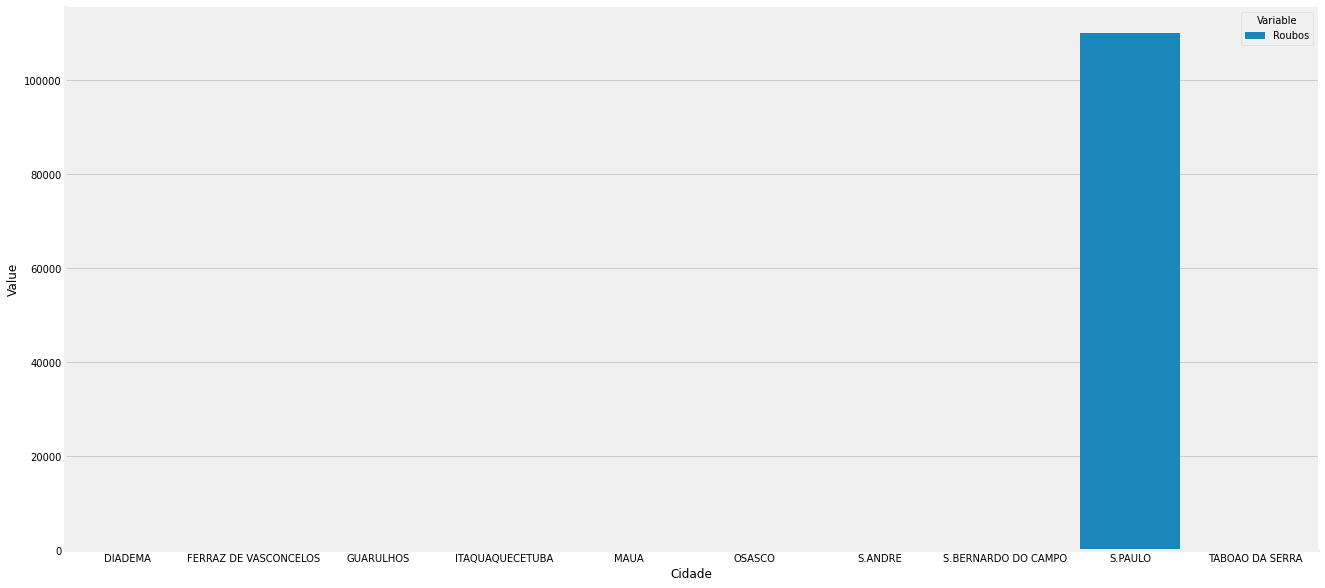

In [ ]:
df_teste = pd.DataFrame({
    'Cidade': list(data.CIDADE.value_counts().iloc[:10].sort_index().index),
    'Roubos': list(data.CIDADE.value_counts().iloc[:10].sort_index().values)
})

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_teste.melt(id_vars='Cidade').rename(columns=str.title)
sns.barplot(x='Cidade', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

Escolarização:

[96.0, 96.2, 96.8, 97.1, 96.4, 96.0, 96.9, 97.4, 97.6, 96.0]


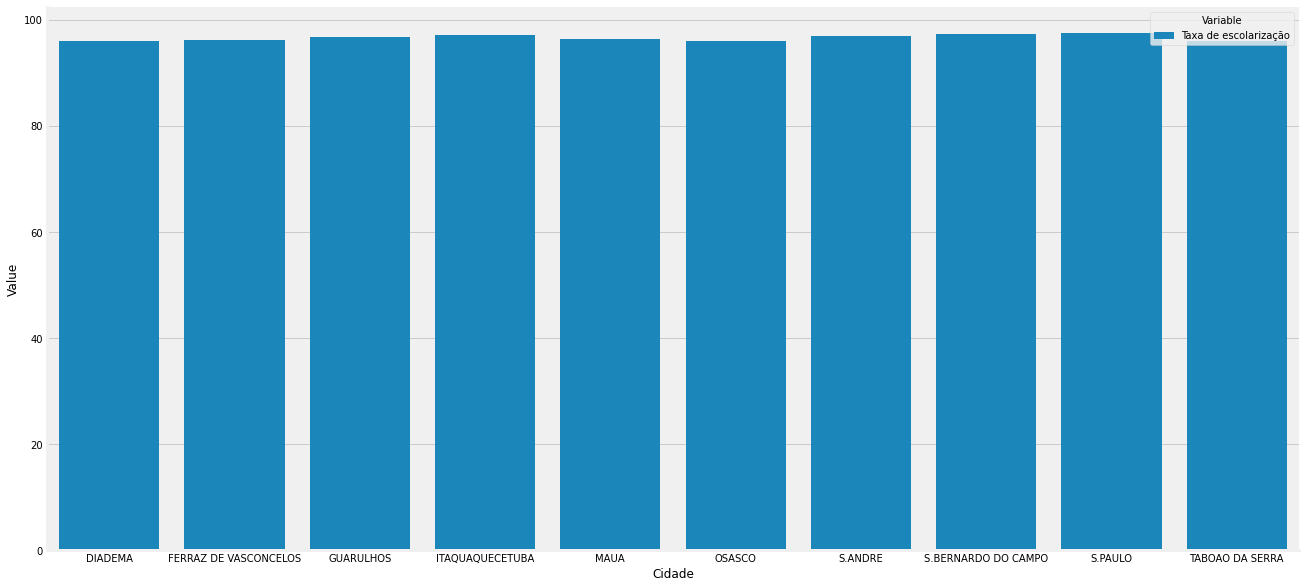

In [ ]:
cidades = ['São Paulo','Guarulhos','Santo André','Campinas','Diadema','São Bernardo do Campo','Osasco','Itaquaquecetuba','Carapicuíba','Praia Grande']
print(list(data_mapa_educacao[data_mapa_educacao['Local'].isin(cidades)]['Taxa de escolarização de 6 a 14 anos de idade']))

df_teste = pd.DataFrame({
    'Cidade': list(data.CIDADE.value_counts().iloc[:10].sort_index().index),
    'Taxa de escolarização': list(data_mapa_educacao[data_mapa_educacao['Local'].isin(cidades)]['Taxa de escolarização de 6 a 14 anos de idade'])

})

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_teste.melt(id_vars='Cidade').rename(columns=str.title)
sns.barplot(x='Cidade', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

PIB:

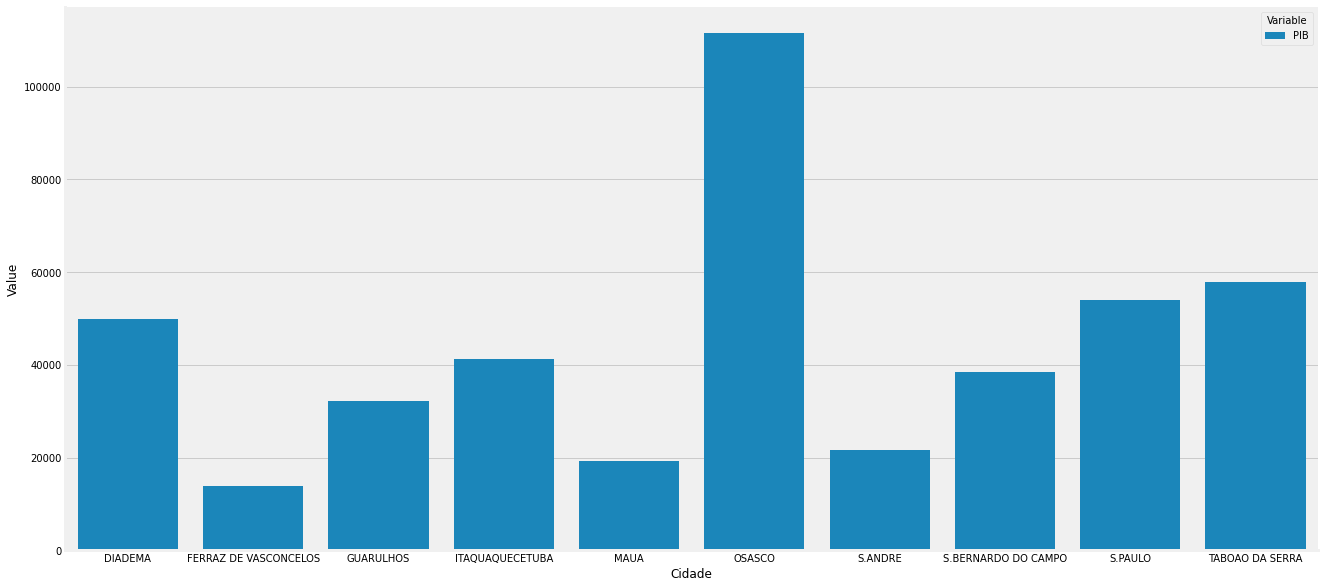

In [ ]:
cidades = ['São Paulo','Guarulhos','Santo André','Campinas','Diadema','São Bernardo do Campo','Osasco','Itaquaquecetuba','Carapicuíba','Praia Grande']

df_teste = pd.DataFrame({
    'Cidade': list(data.CIDADE.value_counts().iloc[:10].sort_index().index),
    'PIB': list(data_mapa_pib[data_mapa_pib['Local'].isin(cidades)]['PIB per capita'])

})

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_teste.melt(id_vars='Cidade').rename(columns=str.title)
sns.barplot(x='Cidade', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

Salário:

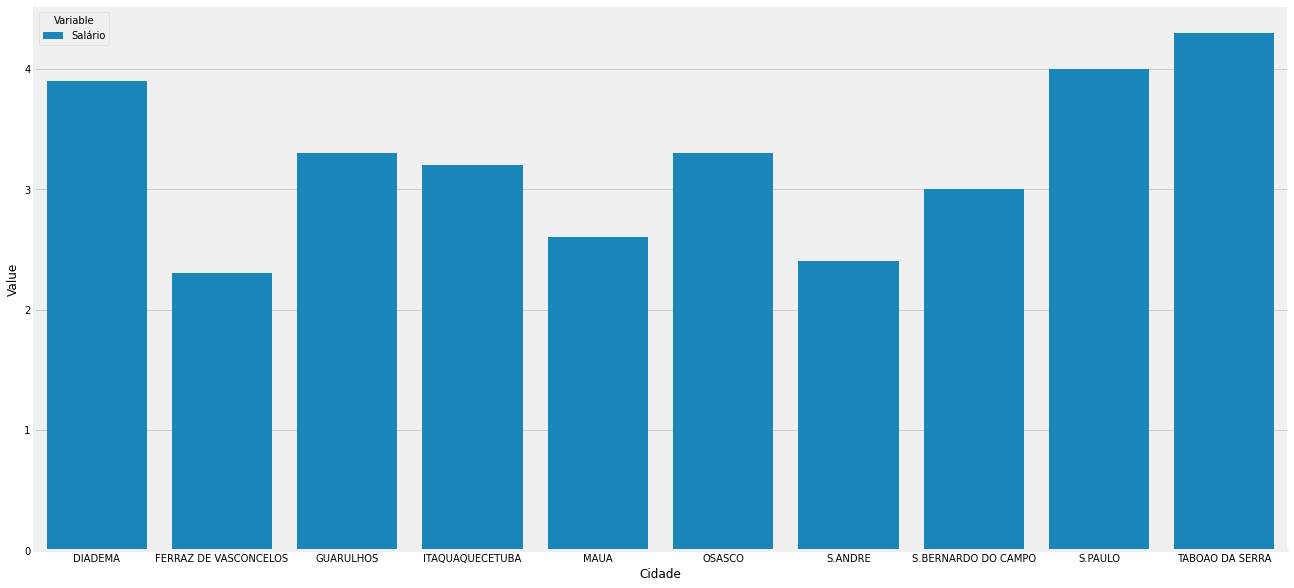

In [ ]:
cidades = ['São Paulo','Guarulhos','Santo André','Campinas','Diadema','São Bernardo do Campo','Osasco','Itaquaquecetuba','Carapicuíba','Praia Grande']

df_teste = pd.DataFrame({
    'Cidade': list(data.CIDADE.value_counts().iloc[:10].sort_index().index),
    'Salário': list(data_mapa_salario[data_mapa_salario['Local'].isin(cidades)]['Salário médio mensal dos trabalhadores formais'])

})

fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_teste.melt(id_vars='Cidade').rename(columns=str.title)
sns.barplot(x='Cidade', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

## São Paulo (cidade)

In [ ]:
# FILTRANDO DADOS DA CIDADE DE SAO PAULO

all_data = filtraSP(all_data)

In [ ]:
# VISUALIZANDO DATAFRAME LIMPO

all_data.head()

ANO_BO DATAOCORRENCIA PERIDOOCORRENCIA  ... diasemana   mesano  mes
0   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0
1   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0
2   2018     2018-08-30       Pela Manhã  ...  Thursday  2018-08  8.0
3   2018     2018-08-30          A Noite  ...  Thursday  2018-08  8.0
4   2018     2018-08-31          A Noite  ...    Friday  2018-08  8.0

[5 rows x 12 columns]

In [ ]:
df_ts = all_data.groupby('DATAOCORRENCIA').count()["ANO_BO"].to_frame().rename(columns={"ANO_BO": "OCORRENCIAS"})

trace = [go.Scatter(x = df_ts.index, y = df_ts.OCORRENCIAS)]

layout = dict(
    title='Ocorrências de Roubo de Celular',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

In [ ]:
ocorrencias = all_data.groupby('mesano').count()['ANO_BO'].reset_index()
ocorrencias.rename(columns={'mesano': 'Data', 'ANO_BO':'Ocorrências de Roubo de Celular'}, inplace=True)

trace = [go.Scatter(x = ocorrencias.Data, y = ocorrencias['Ocorrências de Roubo de Celular'])]

layout = dict(
    title='Ocorrências de Roubo de Celular por Mês',
    yaxis=dict(
    title='Ocorrências'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

Claramente podemos ver uma tendência de aumento no número de ocorrência de roubo de celular.
<br><br>Alguns dos fatores que podem explicar esse aumento são:
<br> - Aumento do número de aparelhos celulares e smartphones.
<br> - Aumento na utilização dos aparelhos em público, devido ao avanço de tecnologias de troca de mensagens.
<br> - Aumento da criminalidade.
<br> - Aumento no número de boletins de ocorrências devido as plataformas digitais.

In [ ]:
# CALCULANDO VARIAÇÕES NO NÚMERO DE OCORRÊNCIAS POR ANO
all_data_until_2019 = all_data[all_data.ANO_BO != 2020]

all_data_until_2019.ANO_BO = all_data_until_2019.ANO_BO.astype(int)
ocorrencias_ano = all_data_until_2019.groupby('ANO_BO').count()['DATAOCORRENCIA'].reset_index()
ocorrencias_ano['VARIACAO'] = 0
ocorrencias_ano['VARIACAO_ACUMULADA'] = 0

for i in range (0, 9):
    ocorrencias_ano.iloc[i+1, 2] = round((1 - (ocorrencias_ano.iloc[i, 1] / ocorrencias_ano.iloc[i+1, 1])) * 100, 2)
    ocorrencias_ano.iloc[i+1, 3] = round((ocorrencias_ano.iloc[i, 3] + ocorrencias_ano.iloc[i+1, 2]), 2)
    
ocorrencias_ano.VARIACAO = ocorrencias_ano.VARIACAO.astype(str) + ' %'
ocorrencias_ano.VARIACAO_ACUMULADA = ocorrencias_ano.VARIACAO_ACUMULADA.astype(str) + ' %'
    
ocorrencias_ano

ANO_BO  DATAOCORRENCIA  VARIACAO VARIACAO_ACUMULADA
0    2010           71724     0.0 %              0.0 %
1    2011           76847    6.67 %             6.67 %
2    2012           80535    4.58 %            11.25 %
3    2013           97868   17.71 %            28.96 %
4    2014          118484    17.4 %            46.36 %
5    2015          102453  -15.65 %            30.71 %
6    2016          125376   18.28 %            48.99 %
7    2017          123824   -1.25 %            47.74 %
8    2018          110183  -12.38 %            35.36 %
9    2019          113723    3.11 %            38.47 %

In [ ]:
data = [
    go.Bar(
        x = ocorrencias_ano.ANO_BO.values[1:],
        y = ocorrencias_ano.VARIACAO.values[1:],
        marker = dict(
          color = ['green', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'green']
        ),
        name = 'Variação com ano anterior'
    ), 
    go.Scatter(
        x = ocorrencias_ano.ANO_BO.values[1:], 
        y = ocorrencias_ano.VARIACAO_ACUMULADA.values[1:],
        marker = dict(
          color = 'blue'
        ),        
        name = 'Variação acumulada'
    )
]

layout = dict(
    title='Variação do Número de Ocorrências de Roubo de Celular',
    yaxis=dict(
        title='Variação (%)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
all_data_until_august = all_data[all_data.DATAOCORRENCIA.dt.month <= 8]

# CALCULANDO VARIAÇÕES NO NÚMERO DE OCORRÊNCIAS POR ANO

all_data_until_august.ANO_BO = all_data_until_august.ANO_BO.astype(int)
ocorrencias_ano = all_data_until_august.groupby('ANO_BO').count()['DATAOCORRENCIA'].reset_index()
ocorrencias_ano['VARIACAO'] = 0
ocorrencias_ano['VARIACAO_ACUMULADA'] = 0

for i in range (0, 10):
    ocorrencias_ano.iloc[i+1, 2] = round((1 - (ocorrencias_ano.iloc[i, 1] / ocorrencias_ano.iloc[i+1, 1])) * 100, 2)
    ocorrencias_ano.iloc[i+1, 3] = round((ocorrencias_ano.iloc[i, 3] + ocorrencias_ano.iloc[i+1, 2]), 2)
    
ocorrencias_ano.VARIACAO = ocorrencias_ano.VARIACAO.astype(str) + ' %'
ocorrencias_ano.VARIACAO_ACUMULADA = ocorrencias_ano.VARIACAO_ACUMULADA.astype(str) + ' %'
    
ocorrencias_ano

ANO_BO  DATAOCORRENCIA  VARIACAO VARIACAO_ACUMULADA
0     2010           48445     0.0 %              0.0 %
1     2011           50978    4.97 %             4.97 %
2     2012           55052     7.4 %            12.37 %
3     2013           63339   13.08 %            25.45 %
4     2014           81924   22.69 %            48.14 %
5     2015           64124  -27.76 %            20.38 %
6     2016           81163   20.99 %            41.37 %
7     2017           86475    6.14 %            47.51 %
8     2018           73571  -17.54 %            29.97 %
9     2019           75629    2.72 %            32.69 %
10    2020           60547  -24.91 %             7.78 %

In [ ]:
data = [
    go.Bar(
        x = ocorrencias_ano.ANO_BO.values[1:],
        y = ocorrencias_ano.VARIACAO.values[1:],
        marker = dict(
          color = ['green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'red']
        ),
        name = 'Variação com ano anterior'
    ), 
    go.Scatter(
        x = ocorrencias_ano.ANO_BO.values[1:], 
        y = ocorrencias_ano.VARIACAO_ACUMULADA.values[1:],
        marker = dict(
          color = 'blue'
        ),        
        name = 'Variação acumulada'
    )
]

layout = dict(
    title='Variação do Número de Ocorrências de Roubo de Celular',
    yaxis=dict(
        title='Variação (%)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [ ]:
all_data['diasemana'] = pd.Categorical(all_data['diasemana'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

trace = [go.Bar(
            x = all_data['diasemana'].value_counts().sort_index().index,
            y = all_data['diasemana'].value_counts().sort_index().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular por dia da semana (2010 - 2020)',
    yaxis=dict(
        title='Ocorrências'
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)



In [ ]:
all_data_until_2019['mes'] = pd.Categorical(all_data_until_2019['mes'], categories=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0], ordered=True)

trace = [go.Bar(
            x = all_data_until_2019['mes'].value_counts().sort_index().index,
            y = all_data_until_2019['mes'].value_counts().sort_index().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular por mês (2010 - 2019)',
    yaxis=dict(
        title='Ocorrências'
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

In [ ]:
colors = ['#170B3B', '#A9D0F5', '#08088A', '#DBA901']

trace = [go.Pie(labels=all_data.PERIDOOCORRENCIA.unique(), values=all_data.PERIDOOCORRENCIA.value_counts().values,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))]

layout = go.Layout(
    title='Período das Ocorrências de Roubo de Celular (2010 - 2020)'
)

fig = go.Figure(data = trace, layout = layout)

py.iplot(fig)

In [ ]:
# FILTRANDO DADOS DE 2020

data = all_data[all_data["ANO_BO"] == 2020].copy()

In [ ]:
trace = [go.Bar(
            y = data['DESCRICAOLOCAL'].value_counts().index,
            x = data['DESCRICAOLOCAL'].value_counts().values,
            orientation='h',
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    height=800,
    title='Locais das Ocorrências de Roubo de Celular em 2020',
    xaxis=dict(
        title = 'Ocorrências',
        type='log',
        ),
     yaxis=go.layout.YAxis(
     automargin=True
     )
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

As vias públicas são os locais de grande preferência da criminalidade para roubar celulares.

In [ ]:
data_ = data[(data['DESCR_TIPO_VEICULO'] != 'Inexist.') & (data['DESCR_TIPO_VEICULO'] != 'Não Informado')]

trace = [go.Bar(
            x = data_["DESCR_TIPO_VEICULO"].value_counts().index,
            y = data_["DESCR_TIPO_VEICULO"].value_counts().values,
            text=data_["DESCR_TIPO_VEICULO"].value_counts().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular em Veículos (2020)',
    yaxis=dict(
        title='Ocorrências',
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

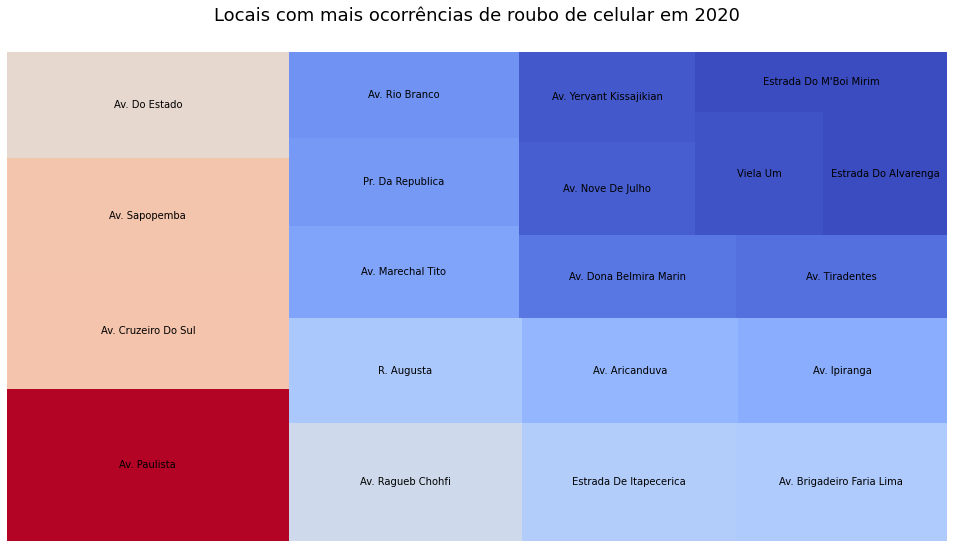

In [ ]:
data_loug = data[data.LOGRADOURO != 'nan']

fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data_loug.LOGRADOURO.value_counts().values[19]
maxi = data_loug.LOGRADOURO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data_loug.LOGRADOURO.value_counts().iloc[:100].values]

squarify.plot(sizes=data_loug.LOGRADOURO.value_counts().iloc[:20].values, label=data_loug.LOGRADOURO.value_counts().iloc[:20].index, color=colors)

plt.axis('off')
plt.title("Locais com mais ocorrências de roubo de celular em 2020", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [ ]:
len(data.LOGRADOURO.unique())

18331

Período das ocorrências para cada local:

In [ ]:
for logradouro in data.LOGRADOURO.unique():
    data_logradouro = data[data.LOGRADOURO == logradouro]
    lista = data_logradouro.PERIDOOCORRENCIA.value_counts().values
    print(logradouro)
    print(data_logradouro.PERIDOOCORRENCIA.unique())
    print(lista/sum(lista)*100)

A saída de streaming foi truncada nas últimas 5000 linhas.
[100.]
R. Jacinto Goncalves
['A Noite']
[100.]
R. Antonio Guganis
['De Madrugada']
[100.]
R. Da Contagem
['A Noite']
[100.]
R. Tetis
['De Madrugada']
[100.]
R. Sabia Natal
['A Noite']
[100.]
R. Petropolis
['A Noite']
[100.]
R. Leontina Attuy Nogueira
['A Noite']
[100.]
R. Guilherme Jeronimo Klosternecht
['A Noite']
[100.]
Av. Doutor Assis Ribeiro. S/N
['Pela Manhã']
[100.]
R. Humberto Marcal
['Em Hora Incerta' 'A Tarde']
[50. 50.]
R. Marechal Rosas
['A Noite' 'De Madrugada']
[50. 50.]
R. Sarah Bernard
['A Noite']
[100.]
R. Santana Do Munhuacu
['De Madrugada']
[100.]
R. Francisco Pio De Melo
['Pela Manhã']
[100.]
Largo Do Rosario
['A Noite']
[100.]
R. Francisco Pedroso De Tolêdo
['A Noite']
[100.]
R. Gilson Rocha Pitta
['Pela Manhã']
[100.]
R. José Alvares Moreira
['De Madrugada']
[100.]
R. Critios
['Pela Manhã']
[100.]
R. Caraúbas
['Pela Manhã']
[100.]
R. Torquarto De Carvalho
['Em Hora Incerta']
[100.]
R. Doutor Oscar Monteiro

In [ ]:
data_paulista = data[data.LOGRADOURO == 'Av. Paulista']

colors = ['#170B3B', '#A9D0F5', '#08088A', '#DBA901']

trace = [go.Pie(labels=data_paulista.PERIDOOCORRENCIA.unique(), values=data_paulista.PERIDOOCORRENCIA.value_counts().values,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))]

layout = go.Layout(
    title='Período das Ocorrências de Roubo de Celular na Avenida Paulista (2020)'
)

fig = go.Figure(data = trace, layout = layout)

py.iplot(fig)

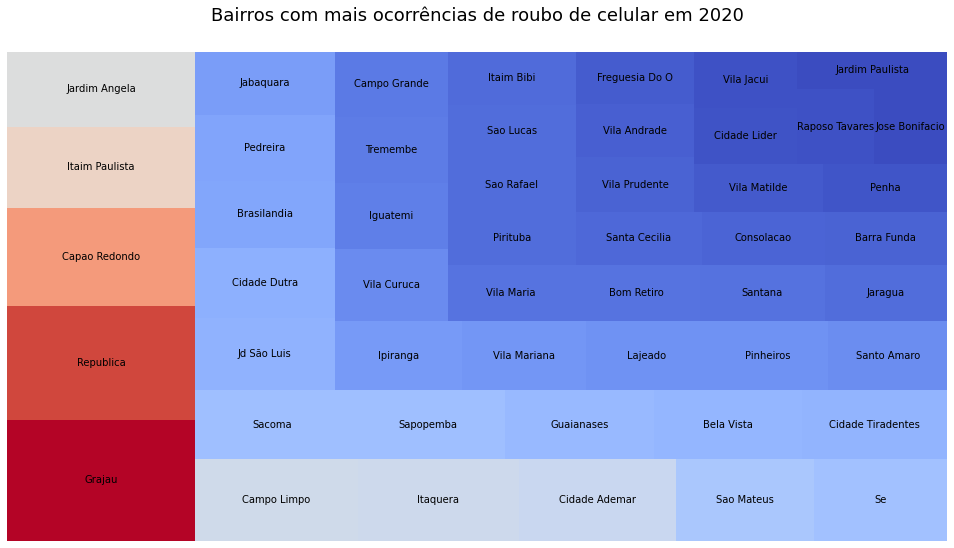

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data.BAIRRO.value_counts().values[49]
maxi = data.BAIRRO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data.BAIRRO.value_counts().iloc[:100].values]

squarify.plot(sizes=data.BAIRRO.value_counts().iloc[:50].values, label=data.BAIRRO.value_counts().iloc[:50].index, color=colors)

plt.axis('off')
plt.title("Bairros com mais ocorrências de roubo de celular em 2020", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [ ]:
data_grajau = data[data.BAIRRO == 'Grajau']

colors = ['#170B3B', '#A9D0F5', '#08088A', '#DBA901']

trace = [go.Pie(labels=data_grajau.PERIDOOCORRENCIA.unique(), values=data_grajau.PERIDOOCORRENCIA.value_counts().values,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))]

layout = go.Layout(
    title='Período das Ocorrências de Roubo de Celular em Grajau (2020)'
)

fig = go.Figure(data = trace, layout = layout)

py.iplot(fig)

In [ ]:
# REMOVENDO NAs E CRIANDO COLUNA COORDENADAS

df = data.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()
df = df[df['DATAOCORRENCIA'] > "2020-07-01"]
df['coord'] = df[['LATITUDE','LONGITUDE']].apply(tuple, axis=1)

### Mapa de Calor dos Roubos de Celulares em Julho e Agosto de 2020

In [ ]:
m = Map([-23.64992751, -46.62569322], zoom_start=10, width='100%', height='100%')
m.add_child(HeatMap(df['coord'], radius=8))
m

### ClusterMap dos Roubos de Celulares em Julho e Agosto de 2020

In [ ]:
pointMap = Map([-23.550, -46.620], zoom_start=10.5, width='100%', height='100%')
pointMap.add_child(FastMarkerCluster(df['coord']))
pointMap

# 6. Prevendo Roubos de Celular

## 6.1 Modelagem ARIMA

In [ ]:
# TRANSFORMANDO SÉRIE TEMPORAL

ocorrencias_dia = all_data.groupby('DATAOCORRENCIA').count()['ANO_BO'].reset_index()
ocorrencias_dia.rename(columns={'DATAOCORRENCIA': 'Data', 'ANO_BO':'Ocorrências de Roubo de Celular'}, inplace=True)

ocorrencias_dia.index =  ocorrencias_dia.Data
ocorrencias_dia.drop(columns='Data', inplace=True)
ocorrencias_dia.index = pd.to_datetime(ocorrencias_dia.index)

ocorrencias_dia = ocorrencias_dia[pd.Timestamp('2020-04-01'):]

train = ocorrencias_dia[pd.Timestamp('2020-04-01'):pd.Timestamp('2020-08-21')]
test = ocorrencias_dia[pd.Timestamp('2020-08-22'):]

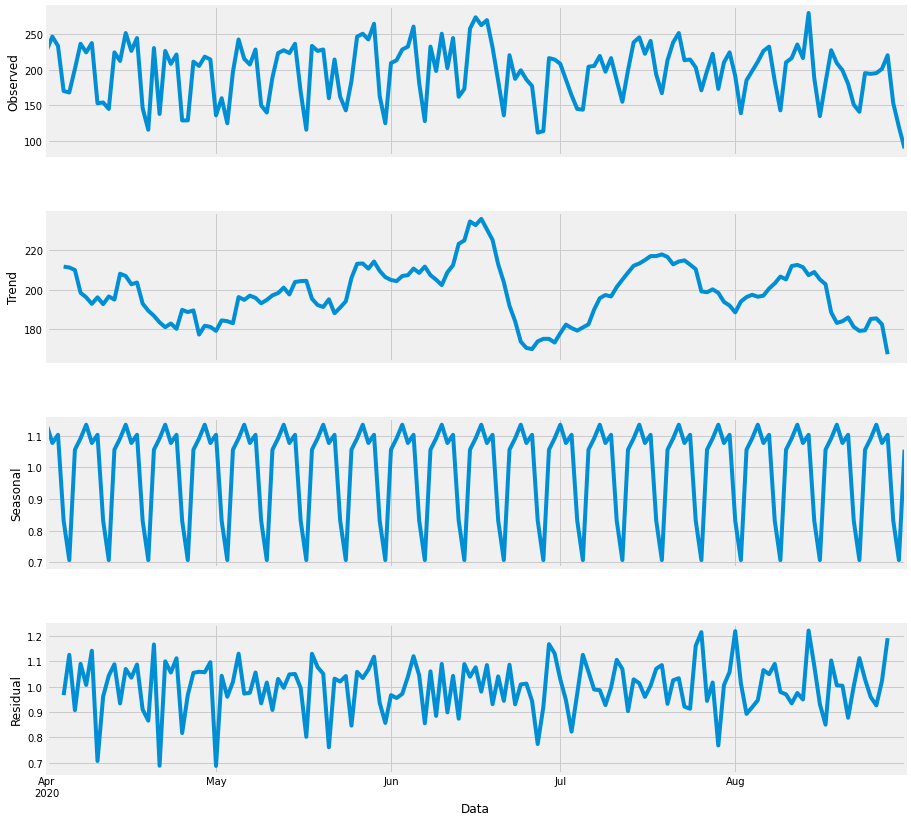

In [ ]:
# IMPORTANDO BIBLIOTECAS

!pip install chart-studio
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

# DECOMPOSIÇÃO DA SÉRIE TEMPORAL

result = seasonal_decompose(ocorrencias_dia, model='multiplicative')
g = result.plot()
g.set_figwidth(14)
g.set_figheight(14)

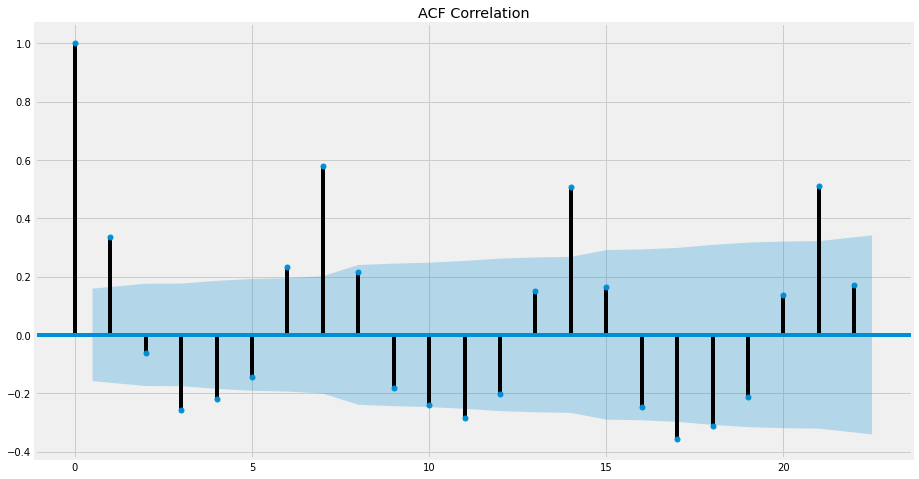

In [ ]:
# IMPORTANDO BIBLIOTECAS

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# PLOT DE CORRELAÇÃO ACF

g = plot_acf(ocorrencias_dia, title="ACF Correlation")
g.set_figheight(8)
g.set_figwidth(14)

Podemos começar diferenciando a série temporal com ordem d = 1, a fim de obter uma série temporal estacionária. Se a série não representar bons resultados, outras diferenciações podem ser necessarias.

In [ ]:
# DIFERENCIANDO SÉRIE TEMPORAL

ocorrencias_diff = ocorrencias_dia.diff(periods=1)
ocorrencias_diff = ocorrencias_diff[1:]

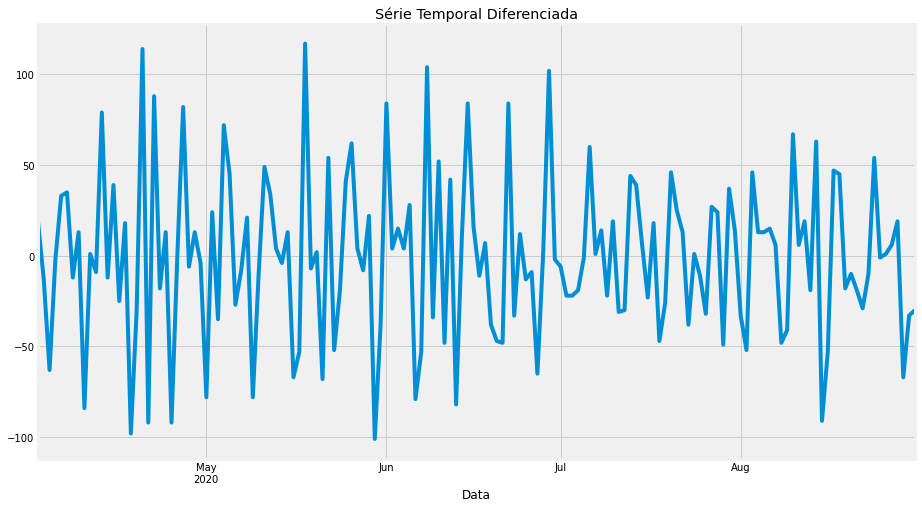

In [ ]:
# PLOT DA SÉRIE TEMPORAL DIFERENCIADA COM D = 1

g = ocorrencias_diff.plot(figsize=(14,8), title="Série Temporal Diferenciada", legend=False)

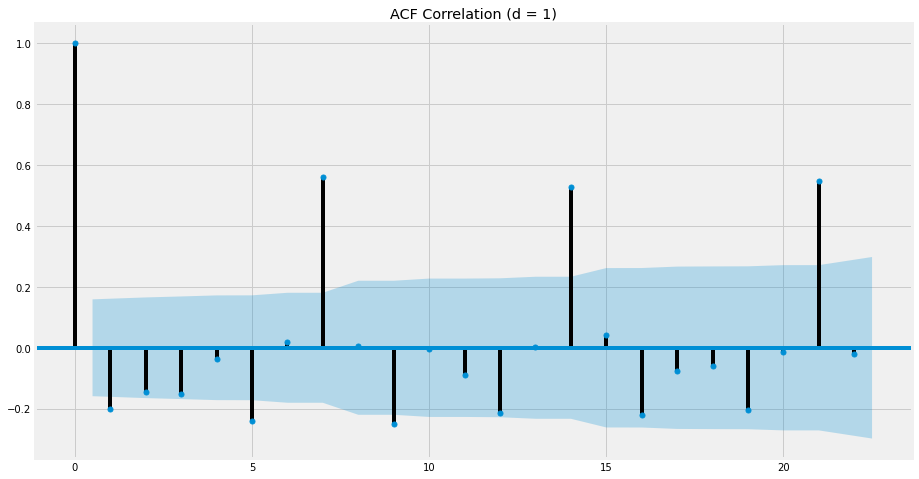

In [ ]:
# PLOT CORRELAÇÃO ACF

g = plot_acf(ocorrencias_diff, title="ACF Correlation (d = 1)")
g.set_figheight(8)
g.set_figwidth(14)

Através do ACF plot, podemos ver que o valor q = 7, pode ser uma boa escolha de parâmetro.

In [ ]:
# DEFINE COMBINAÇÕES PARA p, d e q
pdq = [(p, 1, 7) for p in range(0, 8)]


# CALCULANDO OS MELHORES PARÂMETROS PARA O MODELO

scores = {}

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(train,
                                        order=param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        scores[param] = results.aic
        
    except:
        continue
        
print("Melhores parâmetros: ", min(scores, key=scores.get)," AUC: ", min(scores.values()))

Melhores parâmetros:  (6, 1, 7)  AUC:  1277.8051017680436


In [ ]:
# CRIANDO MODELO COM OS MELHOERS PARÂMETROS 

mod = sm.tsa.statespace.SARIMAX(train,
                                order=min(scores, key=scores.get),
                                #seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

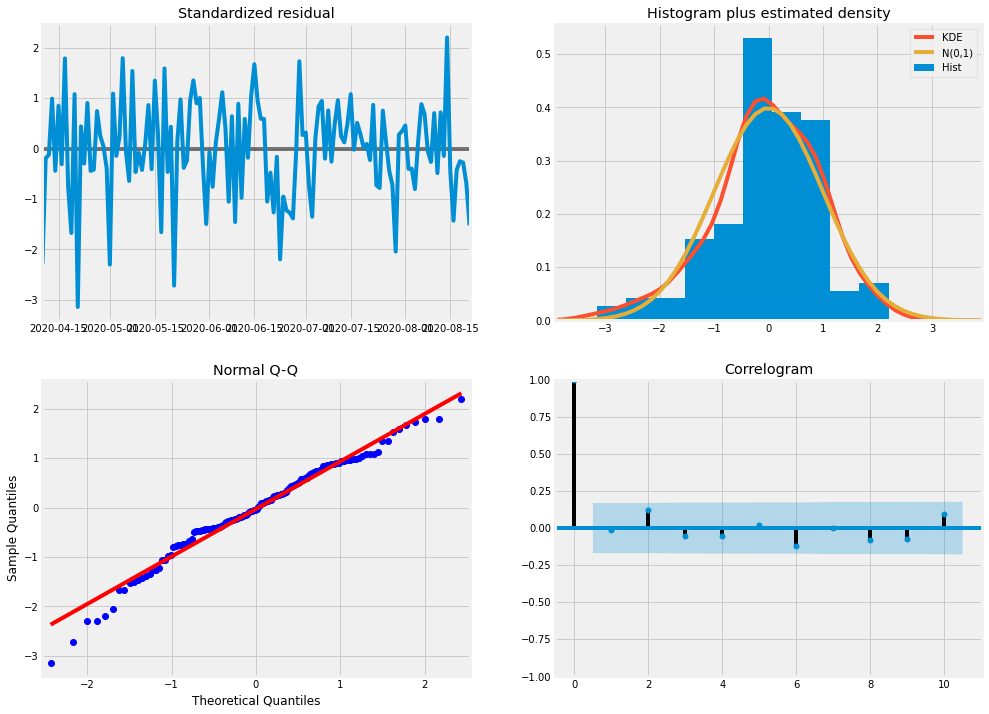

In [ ]:
# RESUMO DO MODELO

results.plot_diagnostics(figsize=(15, 12))
plt.show()

### 6.1.2 Validação

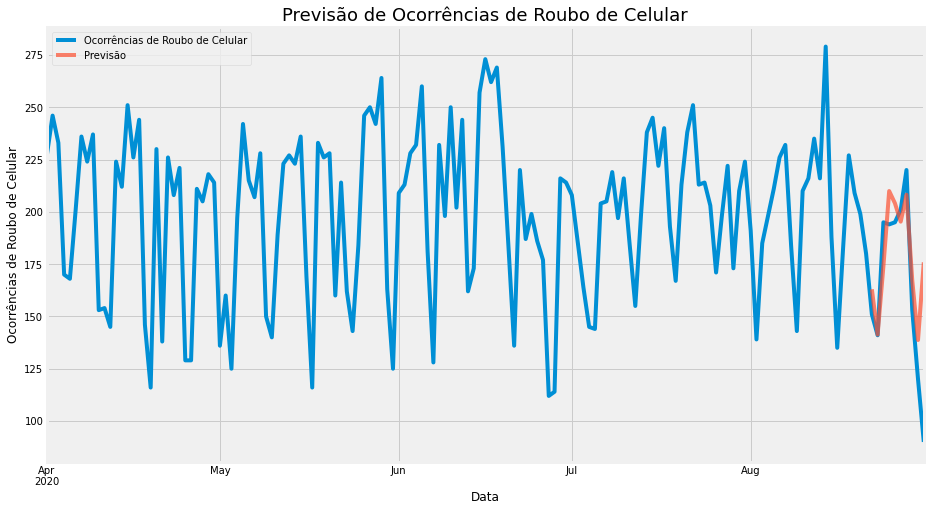

O Mean Squared Error da previsão foi 902


In [ ]:
# VALIDAÇÃO DO MODELO: PREVENDO OCORRÊNCIAS A PARTIR DE 2017

pred = results.get_prediction(start=pd.to_datetime('2020-08-22'), end=pd.to_datetime('2020-08-31'), dynamic=False)

ax = ocorrencias_dia.plot(figsize=(14, 8))
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7)

ax.set_title("Previsão de Ocorrências de Roubo de Celular", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Ocorrências de Roubo de Celular')
plt.legend()

plt.show()

# CALCULANDO MSE

y_forecasted = pred.predicted_mean
y_truth = test.squeeze()

mse = ((y_forecasted - y_truth) ** 2).mean()

print('O Mean Squared Error da previsão foi {}'.format(round(mse)))

### 6.1.3. Previsão

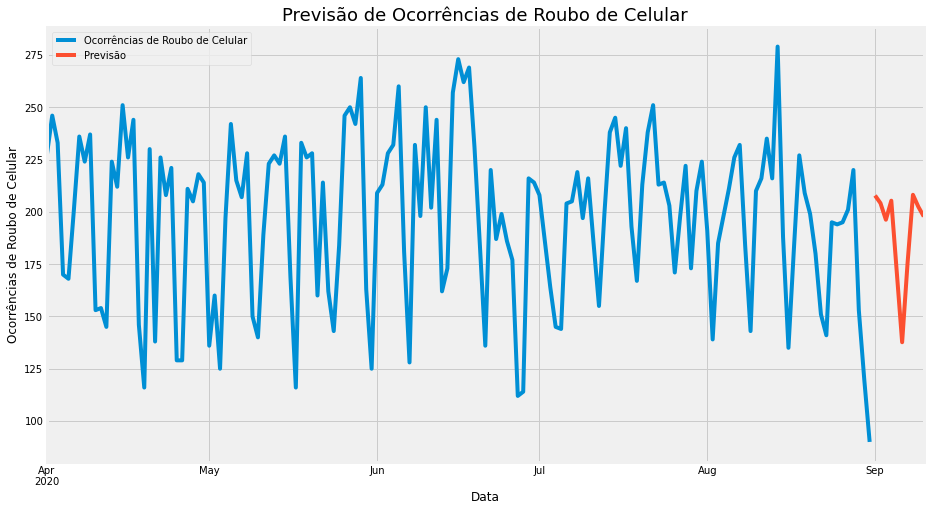

In [ ]:
# PREVENDO OCORRÊNCIAS PARA OS PRÓXIMOS 10 DIAS

pred_uc = results.predict(start=pd.to_datetime('2020-09-01'), end=pd.to_datetime('2020-09-10'))

ax = ocorrencias_dia.plot(figsize=(14, 8))
pred_uc.plot(ax=ax, label='Previsão')

ax.set_title("Previsão de Ocorrências de Roubo de Celular", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Ocorrências de Roubo de Celular')

plt.legend()
plt.show()

A previsão realizada pelo modelo ARIMA reforça a tendência histórica de crescimento dos roubos de celulares, com um intervalo de confiança relativamente alto, devido as variações encontradas na série temporal.

## 6.2 Modelagem HOLT WINTERS

### 6.2.2 Validação

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

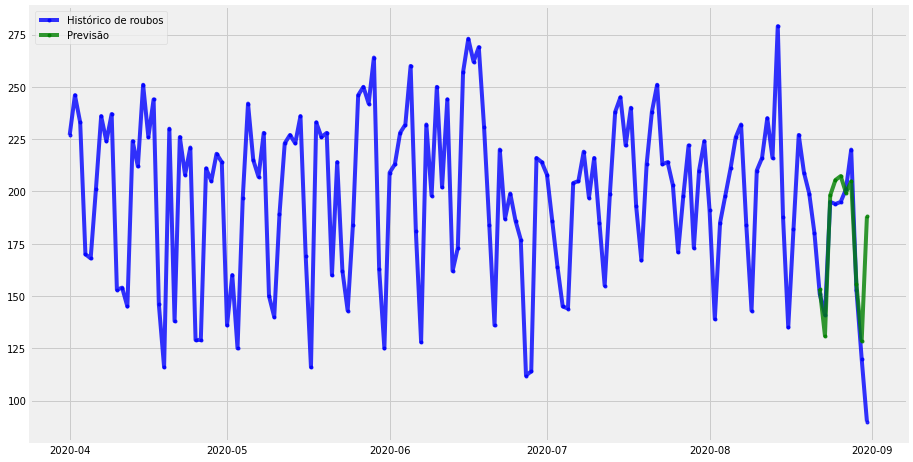

O Mean Squared Error da previsão foi 1033


In [ ]:
model = HWES(train, seasonal_periods=14, trend='mul', seasonal='mul')
fitted = model.fit()

pred = fitted.predict(start=pd.to_datetime('2020-08-22'), end=pd.to_datetime('2020-08-31'))

fig = plt.figure(figsize=(14, 8))

past, = plt.plot(ocorrencias_dia.index, ocorrencias_dia, 'b.-', label='Histórico de roubos', alpha=.8)
predicted_future, = plt.plot(pred.index, pred, 'g.-', label='Previsão', alpha=.8)
plt.legend(handles=[past, predicted_future])
plt.show()

# CALCULANDO MSE
y_truth = test.squeeze()
mse = ((pred - y_truth) ** 2).mean()
print('O Mean Squared Error da previsão foi {}'.format(round(mse)))

### 6.2.3 Previsão

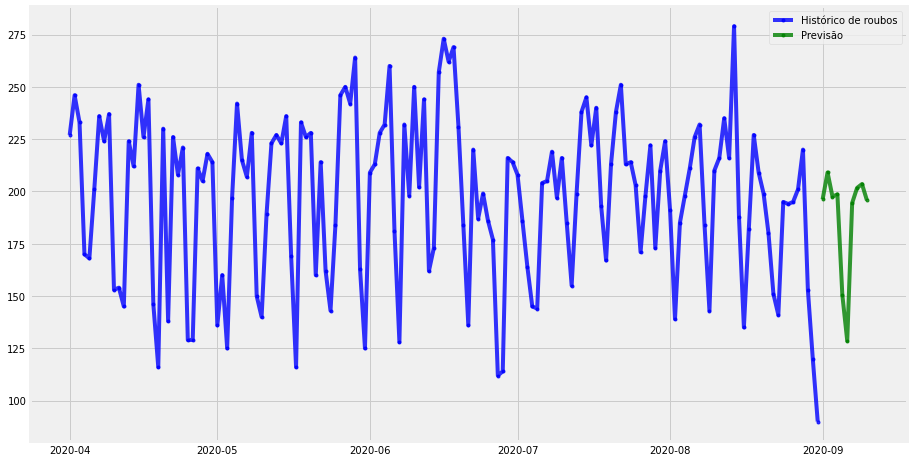

In [ ]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('')
past, = plt.plot(ocorrencias_dia.index, ocorrencias_dia, 'b.-', label='Histórico de roubos', alpha=.8)
pred = fitted.predict(start=pd.to_datetime('2020-09-01'), end=pd.to_datetime('2020-09-10'))
predicted_future, = plt.plot(pred.index, pred, 'g.-', label='Previsão', alpha=.8)
plt.legend(handles=[past, predicted_future])
plt.show()

## 6.3 Modelagem LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=2)

length = 7
n_features = 1

scaler = MinMaxScaler()
scaled_full_data = scaler.fit_transform(train)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

model = Sequential()
model.add(LSTM(units=50, activation='relu', dropout=0.2, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience = 2, 
    verbose=1,
    factor=0.3, 
    min_lr=0.000001)

model.fit_generator(generator=generator, epochs=150, callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0803
Epoch 2/150
136/136 [==============================] - 2s 13ms/step - loss: 0.0587
Epoch 3/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0581
Epoch 4/150
136/136 [==============================] - 2s 13ms/step - loss: 0.0522
Epoch 5/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0495
Epoch 6/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0553
Epoch 7/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0496
Epoch 8/150
136/136 [==============================] - 2s 14ms/step - loss: 0.0507
Epoch 9/150
136/136 [==============================] - 2s 12ms/step - loss: 0.0444
Epoch 10/150
136/136 [==============================] - 2s 13ms/step - loss: 0.0473
Epoch 11/150
136/136 [==============================] - 2s 13ms/step - loss: 0.0466
Epoch 12/

### 6.3.1 Validação

In [ ]:
periods = 10

lstm_predictions_scaled = []
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  lstm_predictions_scaled.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis = 1)

lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
periods = 10
rng = pd.date_range(start='2020-08-22', periods=periods, freq='D')
pred_lstm = pd.DataFrame({ 'Data': rng, 'Ocorrências de Roubo de Celular': lstm_predictions.ravel() })
pred_lstm.index =  pred_lstm.Data
pred_lstm.drop(columns='Data', inplace=True)
pred_lstm.index = pd.to_datetime(pred_lstm.index)

In [ ]:
# CALCULANDO MSE
y_truth = test.squeeze()
pred = lstm_predictions.squeeze()
mse = ((pred - y_truth) ** 2).mean()
print('O Mean Squared Error da previsão foi {}'.format(round(mse)))

O Mean Squared Error da previsão foi 931


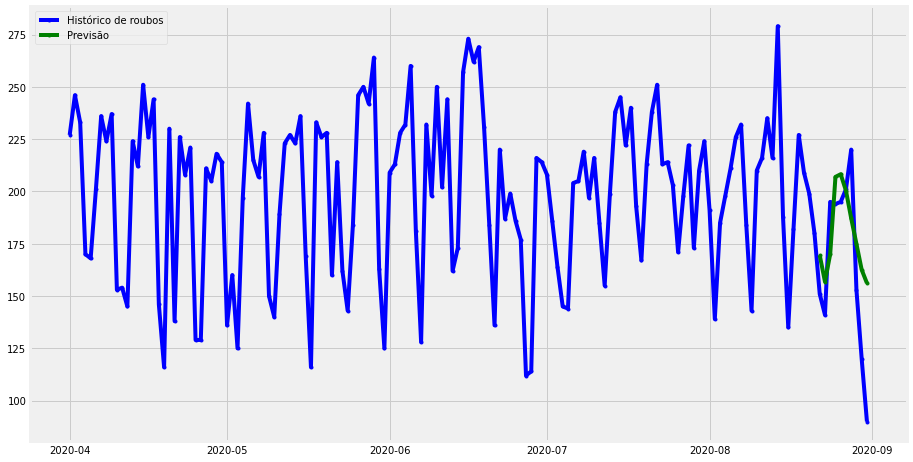

In [ ]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('')
past, = plt.plot(ocorrencias_dia.index, ocorrencias_dia, 'b.-', label='Histórico de roubos')
predicted_future, = plt.plot(pred_lstm.index, pred_lstm, 'g.-', label='Previsão')
plt.legend(handles=[past, predicted_future])
plt.show()

### 6.3.2 Previsão

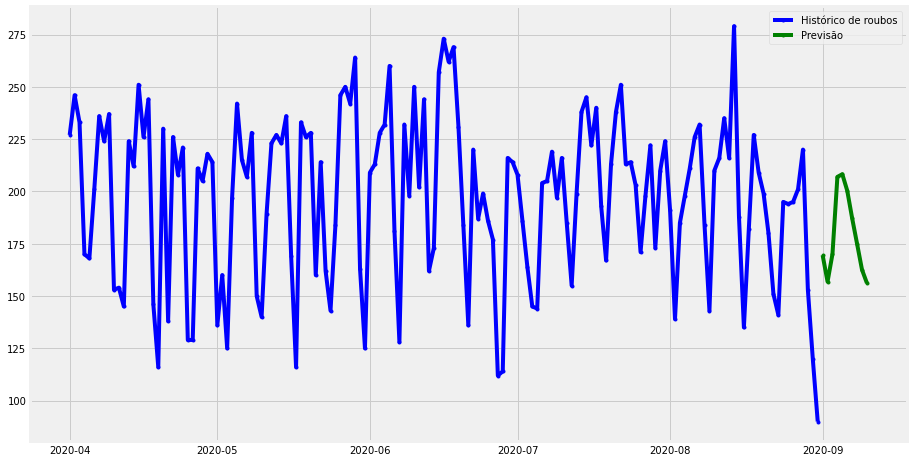

In [ ]:
periods = 10
rng = pd.date_range(start='2020-09-01', periods=periods, freq='D')
pred_lstm = pd.DataFrame({ 'Data': rng, 'Ocorrências de Roubo de Celular': lstm_predictions.ravel() })
pred_lstm.index =  pred_lstm.Data
pred_lstm.drop(columns='Data', inplace=True)
pred_lstm.index = pd.to_datetime(pred_lstm.index)

fig = plt.figure(figsize=(14, 8))
fig.suptitle('')
past, = plt.plot(ocorrencias_dia.index, ocorrencias_dia, 'b.-', label='Histórico de roubos')
predicted_future, = plt.plot(pred_lstm.index, pred_lstm, 'g.-', label='Previsão')
plt.legend(handles=[past, predicted_future])
plt.show()